In [ ]:
## Are there different 'dynamics'/'trajectories' in the immigration sentiment that will be easier to analyse if separated?


## Looks a bit null-result-y
# best I get is a sense that there's a 'wave' effect with some voters being more susceptible to shift based on the which group of waves
# with the crude means we get same pattern => something there beyond noise
# *also* that the primary predictorsa are immigEcon W22/23/25
#          - W8/W9 variables (asylumMore, immigrantsWelfareState, immigEcon, immigCultural, euMore)
#          - immigrantsWelfareStateW20
#          - immigUKIPW9

# e.g. some people move pos a lot 7-11/neg a lot 14-25

## TRY WITH DIFFS DONE
## TRY WITH CRUDE MEANS DONE
## THEN TRY LOOKING AT TRAJECTORIES ALONGSIDE CHANGING LIKECON ELSEWHERE

In [1]:
%%time
dataset_name = "W25_comb"
df_list = "BES_Panel|BES_reduced_with_na"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list

Toggle code

2024-02-20 14:01:24,090 WARNING: panel.io.resources - Mimetype declaration for .js files was set to 'text/plain'. This will interefere with serving JS modules. Ensure your system does not override the mimetype declaration and/or contact your system administrator. 
var_type (10365, 13)
Wall time: 3min 2s


In [ ]:
## try PCA
## fill in blanks with 5 (naff but easy)




In [2]:
def match_eff(df_columns, pattern, case_sensitive=False, mask=None):
    if case_sensitive:
        return [x for x in df_columns if re.match(pattern, x)]
    else:
        return [x for x in df_columns if re.match(pattern, x, re.IGNORECASE)]

def search_eff(df_columns, pattern, case_sensitive=False, mask=None):
    if case_sensitive:
        return [x for x in df_columns if re.search(pattern, x)]
    else:
        return [x for x in df_columns if re.search(pattern, x, re.IGNORECASE)]

In [41]:
immigSelves = BES_reduced_with_na[search_eff(BES_reduced_with_na.columns,"immigSelf")]
immigSelves.drop("immigSelfW12__Allow many more",axis=1,inplace=True) # only 8259 non nulls
immigSelves.drop("immigSelfW21__Allow many more",axis=1,inplace=True)
immigSelves.drop("immigSelfW17__Allow many more",axis=1,inplace=True)
immigSelves.drop("immigSelfW22__Allow many more",axis=1,inplace=True)
immigSelves.drop("immigSelfW23__Allow many more",axis=1,inplace=True)

display(immigSelves.notnull().sum())

dontKnows = BES_Panel[search_eff(BES_Panel.columns,"immigSelf")]=="Don't know"
dontKnows.drop("immigSelfW12",axis=1,inplace=True)
dontKnows.drop("immigSelfW13",axis=1,inplace=True)
dontKnows.drop("immigSelfW21",axis=1,inplace=True)
dontKnows.drop("immigSelfW17",axis=1,inplace=True)
dontKnows.drop("immigSelfW22",axis=1,inplace=True)
dontKnows.drop("immigSelfW23",axis=1,inplace=True)

dontKnows.columns = immigSelves.columns
for col in immigSelves.columns:
    immigSelves.loc[dontKnows[col].values,col] = 5

display(immigSelves.notnull().all(axis=1).sum())

display(immigSelves.diff(axis=1).notnull().sum())

immigSelfW7__Allow many more     26966
immigSelfW8__Allow many more     30249
immigSelfW9__Allow many more     28146
immigSelfW10__Allow many more    26967
immigSelfW11__Allow many more    27908
immigSelfW14__Allow many more    28138
immigSelfW15__Allow many more    27678
immigSelfW16__Allow many more    33922
immigSelfW20__Allow many more    28510
immigSelfW25__Allow many more    27826
dtype: int64

1853

immigSelfW7__Allow many more         0
immigSelfW8__Allow many more     24432
immigSelfW9__Allow many more     27555
immigSelfW10__Allow many more    19380
immigSelfW11__Allow many more    21949
immigSelfW14__Allow many more    19477
immigSelfW15__Allow many more    20129
immigSelfW16__Allow many more    20063
immigSelfW20__Allow many more    18460
immigSelfW25__Allow many more    14146
dtype: int64

In [69]:
# necessarily sample size for *complete* data over multiples waves is going to be Le Suck

BES_std = immigSelves[immigSelves.notnull().all(axis=1)]

BES_std = standard_scale(BES_std)

average log-likelihood of all samples: -9.667512382631239
number of iterations: 2
Wall time: 368 ms


<AxesSubplot:>

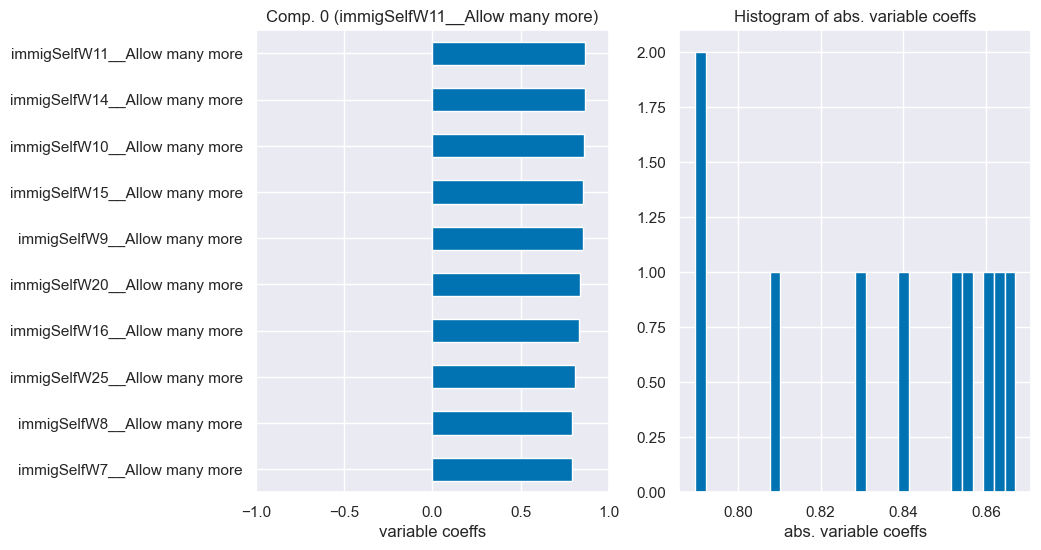

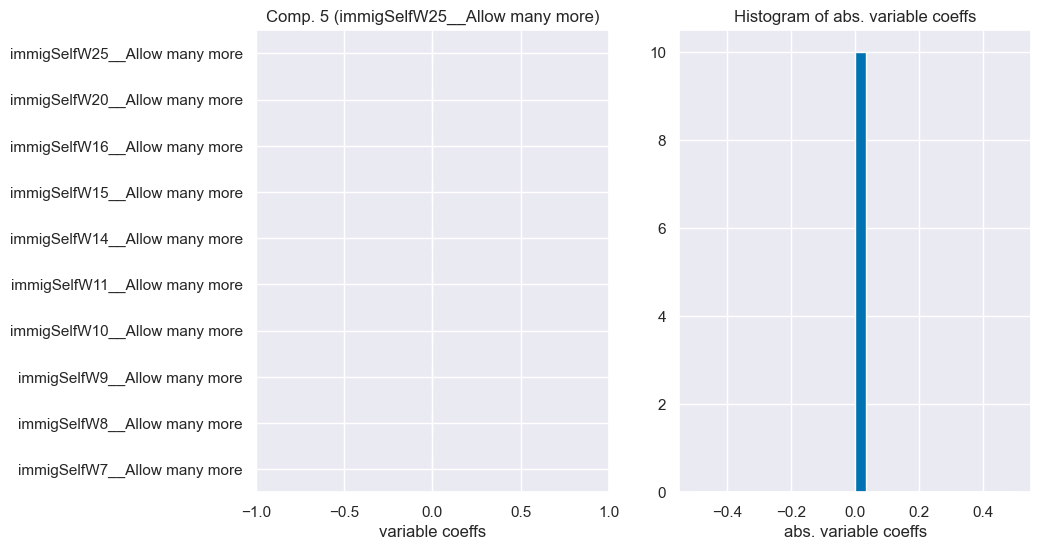

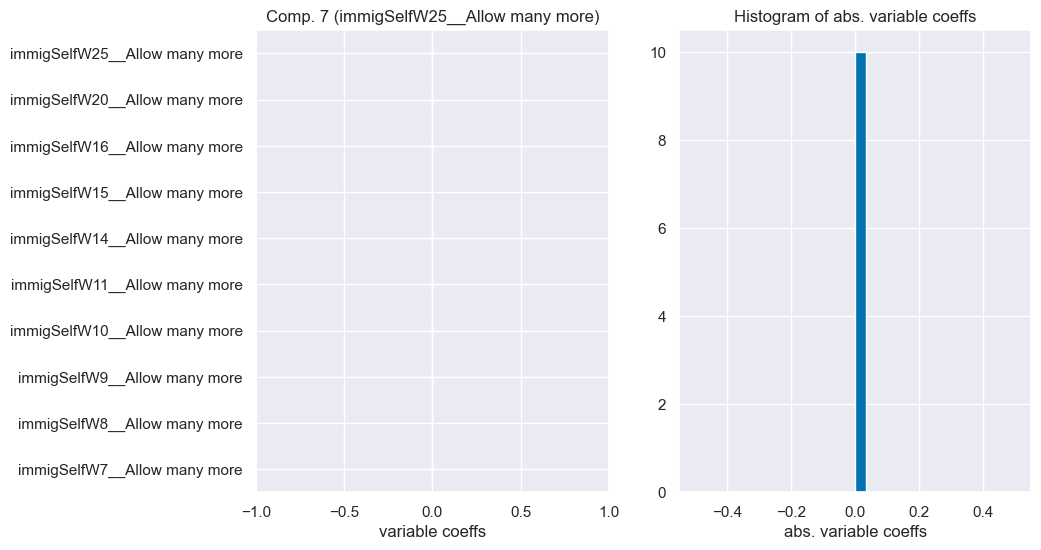

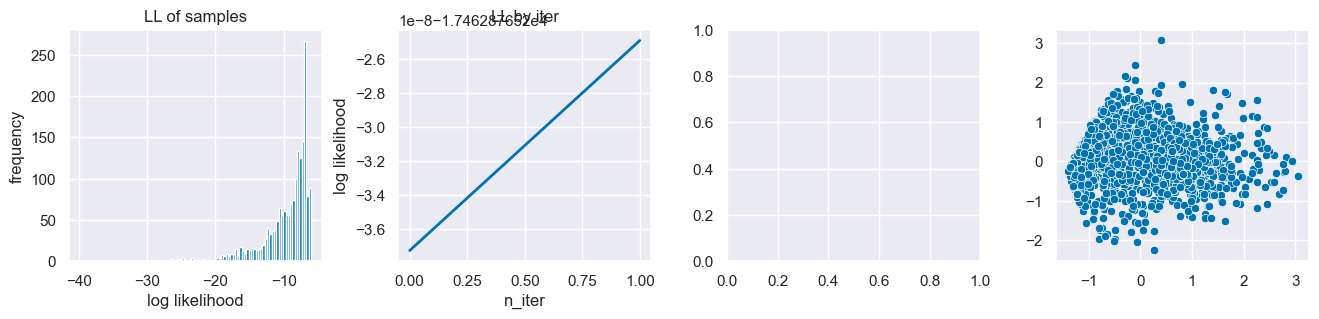

In [70]:
%%time
from sklearn.decomposition import PCA, FactorAnalysis

n_components = 10

# decomp = PCA(svd_solver="full",n_components =n_components )
decomp = FactorAnalysis(n_components =n_components )

decomp.fit(BES_std)
BES_decomp = decomp.transform(BES_std)
# BES_decomp  = pd.DataFrame(BES_decomp,index=BES_num.index)
cols = BES_std.columns
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp, cols, BES_decomp,
                                                          show_first_x_comps=n_components);

display_pca_data(n_components, decomp, BES_std)
sns.scatterplot(x=BES_decomp[:,0],y=BES_decomp[:,1])

average log-likelihood of all samples: -9.45032582724156
number of iterations: 9
Wall time: 148 ms


<AxesSubplot:>

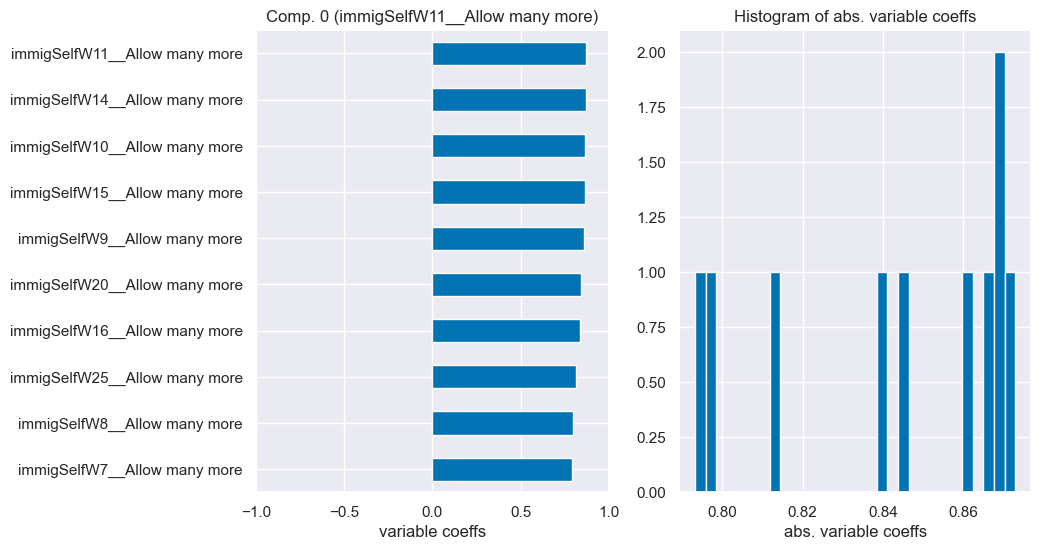

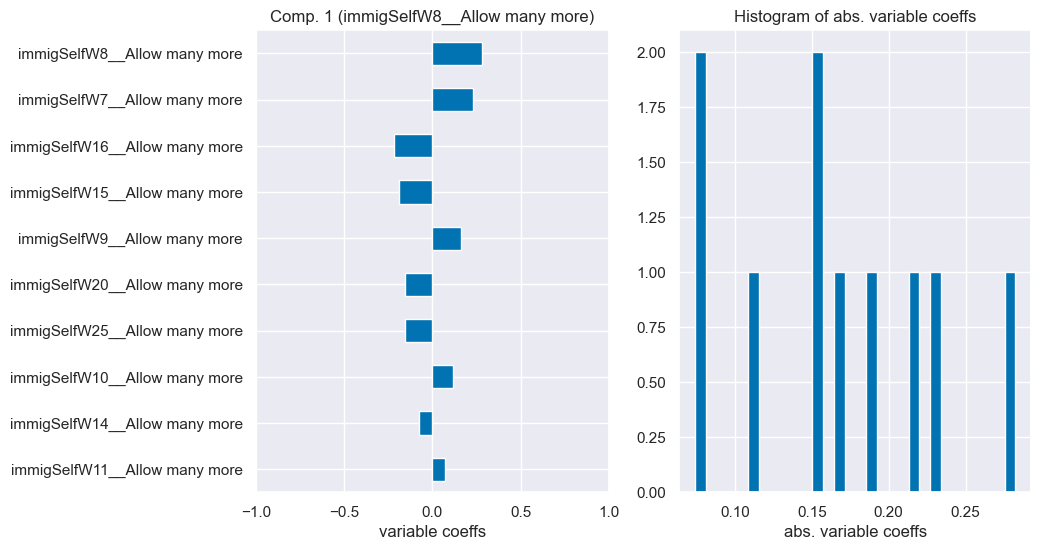

In [71]:
%%time
from sklearn.decomposition import PCA, FactorAnalysis

n_components = 2

# decomp = PCA(svd_solver="full",n_components =n_components )
decomp = FactorAnalysis(n_components =n_components )

decomp.fit(BES_std)
BES_decomp = decomp.transform(BES_std)
# BES_decomp  = pd.DataFrame(BES_decomp,index=BES_num.index)
cols = BES_std.columns
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp, cols, BES_decomp,
                                                          show_first_x_comps=n_components);

display_pca_data(n_components, decomp, BES_std)
sns.scatterplot(x=BES_decomp[:,0],y=BES_decomp[:,1])

explained variance ratio (first 30): [0.73618963 0.05895842 0.03335542 0.02920805 0.02838094 0.0247088
 0.02448541 0.02295859 0.02147191 0.02028284]
explained variance (first 30): [7.36587143 0.58990255 0.33373426 0.29223816 0.28396269 0.2472214
 0.24498628 0.22970985 0.21483506 0.20293787]
noise variance: 0.0
average log-likelihood of all samples: -9.424111103672356
Wall time: 507 ms


<AxesSubplot:>

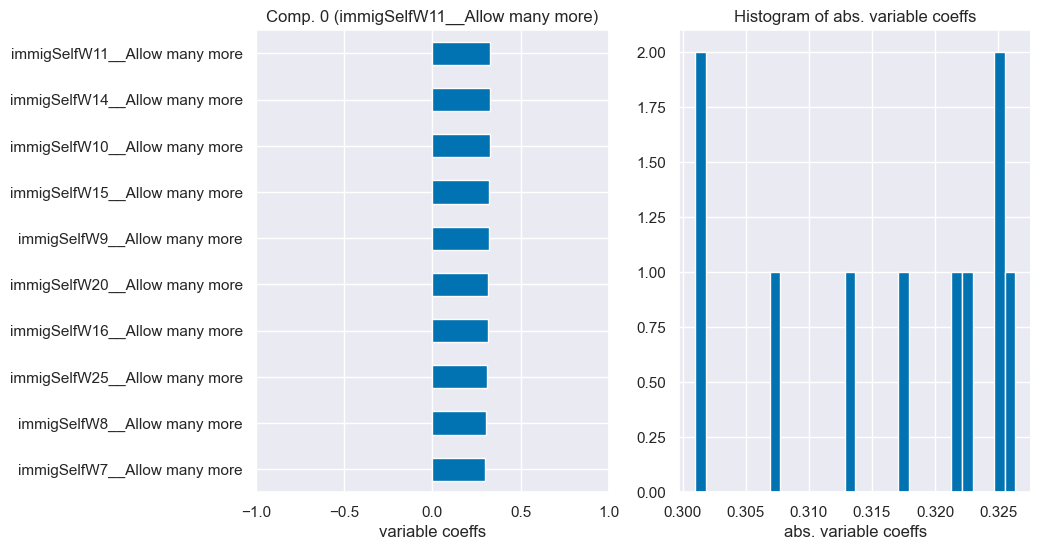

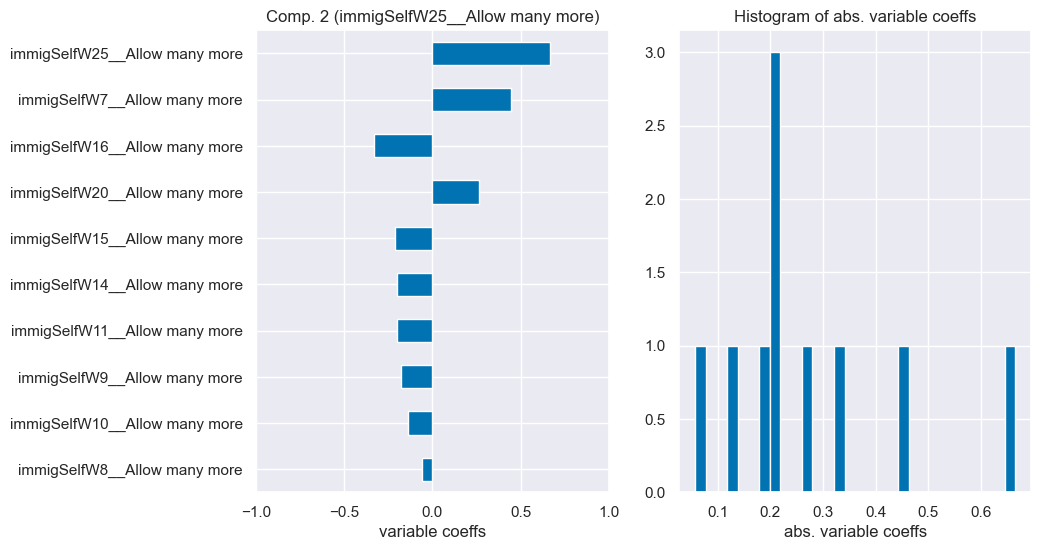

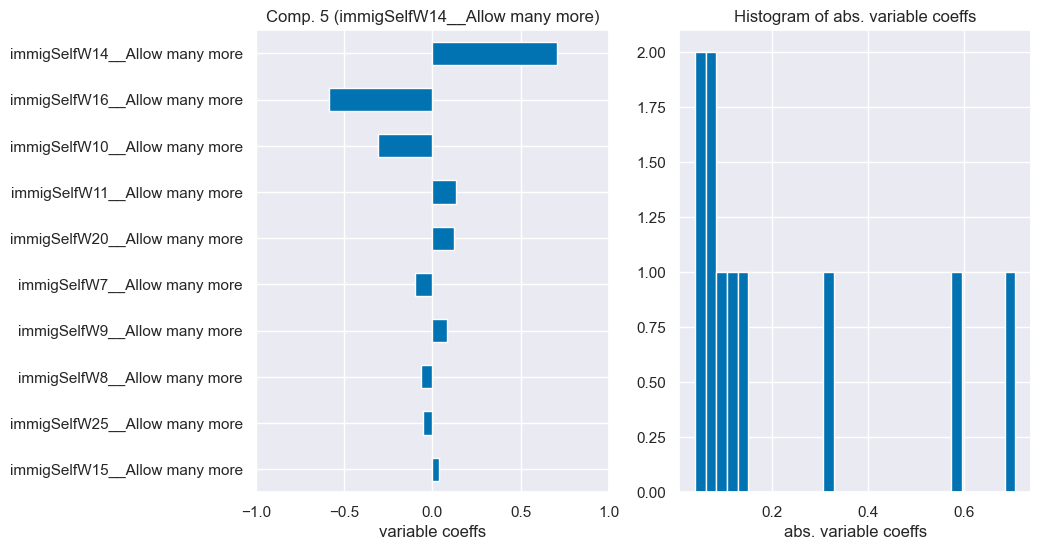

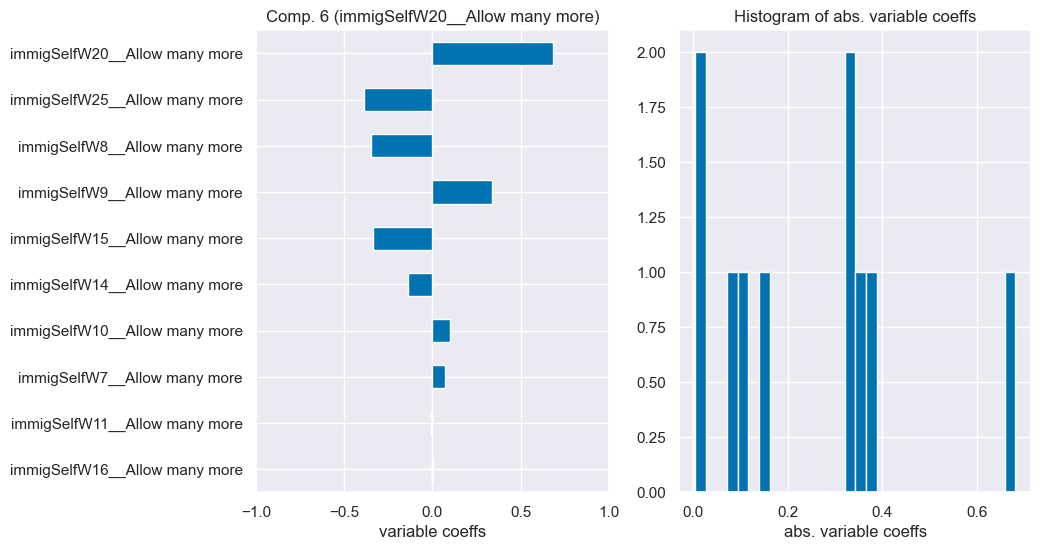

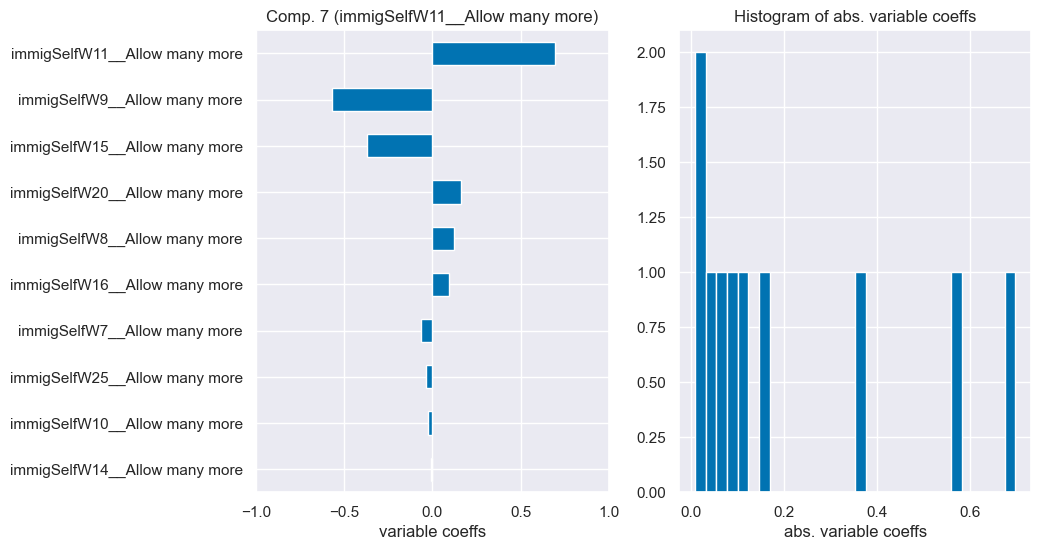

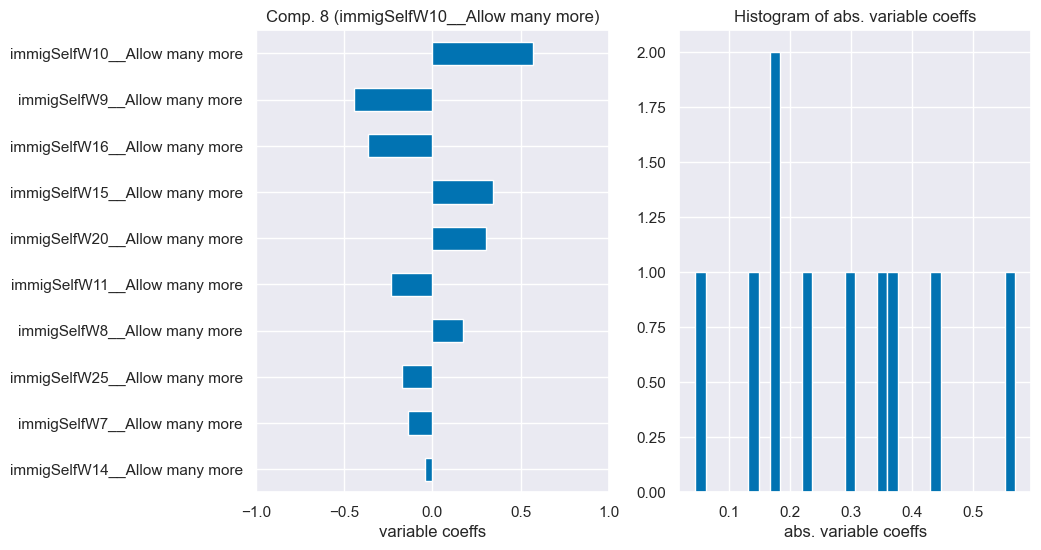

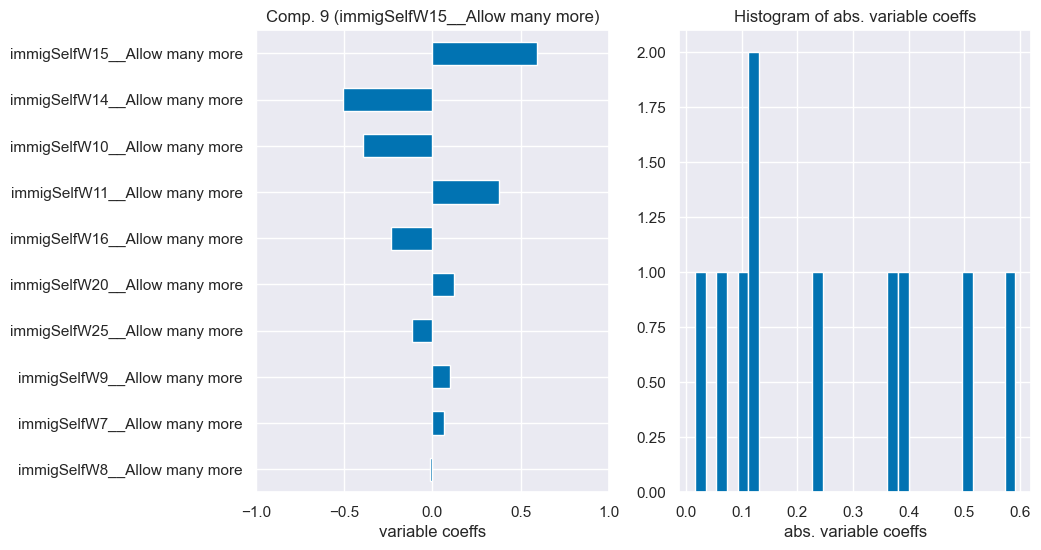

In [72]:
%%time
from sklearn.decomposition import PCA, FactorAnalysis

n_components = 10

decomp = PCA(svd_solver="full",n_components =n_components )
# decomp = FactorAnalysis(n_components =n_components )

decomp.fit(BES_std)
BES_decomp = decomp.transform(BES_std)
# BES_decomp  = pd.DataFrame(BES_decomp,index=BES_num.index)
cols = BES_std.columns
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp, cols, BES_decomp,
                                                          show_first_x_comps=n_components);

display_pca_data(n_components, decomp, BES_std)
sns.scatterplot(x=BES_decomp[:,0],y=BES_decomp[:,1])

explained variance ratio (first 30): [0.73618963 0.05895842]
explained variance (first 30): [7.36587143 0.58990255]
noise variance: 0.25620319796414903
average log-likelihood of all samples: -9.474079097780468
Wall time: 126 ms


<AxesSubplot:>

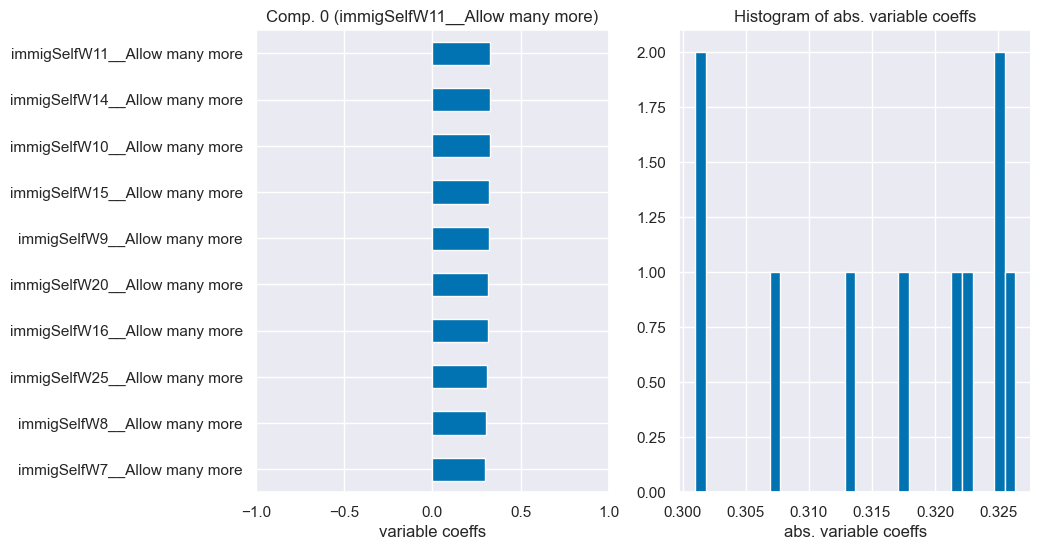

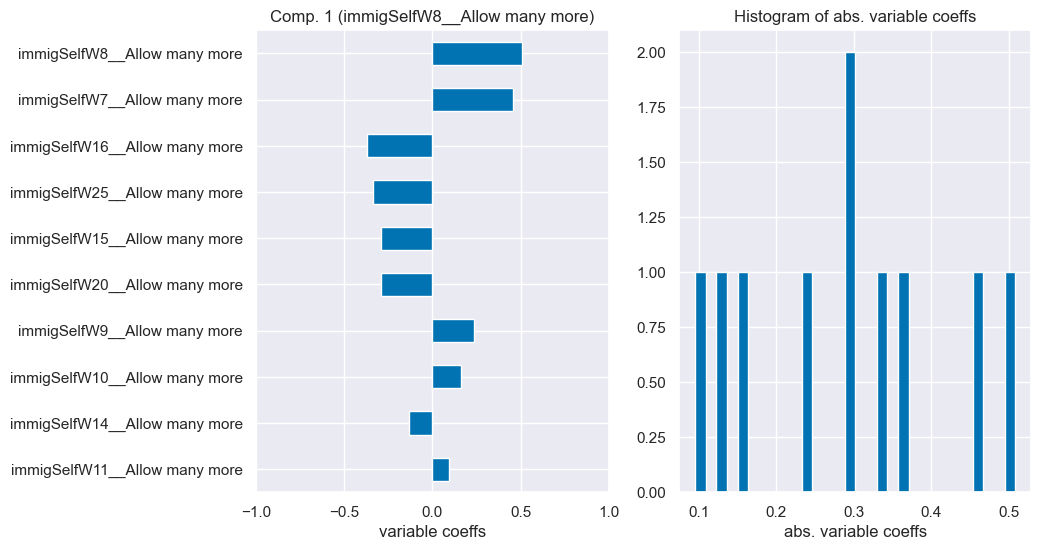

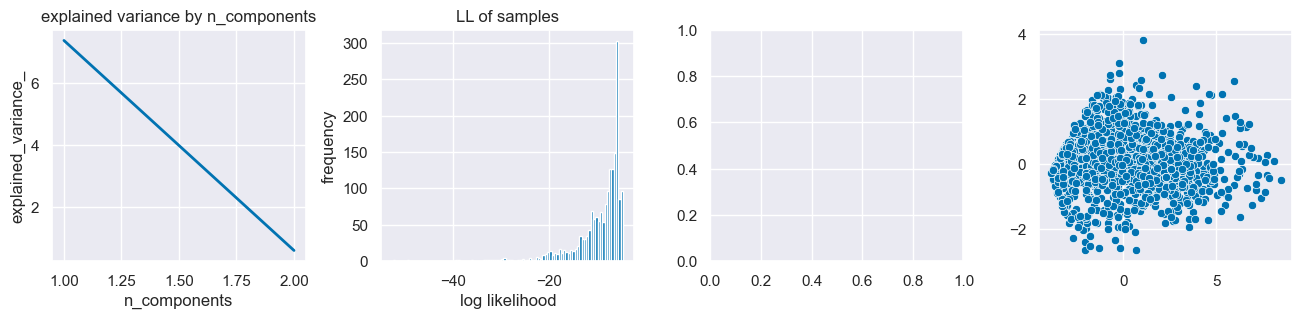

In [73]:
%%time
from sklearn.decomposition import PCA, FactorAnalysis

n_components = 2

decomp = PCA(svd_solver="full",n_components =n_components )
# decomp = FactorAnalysis(n_components =n_components )

decomp.fit(BES_std)
BES_decomp = decomp.transform(BES_std)
# BES_decomp  = pd.DataFrame(BES_decomp,index=BES_num.index)
cols = BES_std.columns
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp, cols, BES_decomp,
                                                          show_first_x_comps=n_components);

display_pca_data(n_components, decomp, BES_std)
sns.scatterplot(x=BES_decomp[:,0],y=BES_decomp[:,1])

In [85]:
BES_std

immigSelfW7__Allow many more  immigSelfW8__Allow many more  \
29                        -0.325421                     -0.706985   
83                        -1.126758                     -1.098509   
102                       -1.126758                      0.859115   
125                       -1.126758                      0.859115   
129                        0.876584                     -0.315460   
...                             ...                           ...   
50717                      0.876584                      0.859115   
50870                      2.479257                      2.033690   
50884                      0.075247                      0.076065   
51025                      0.075247                      0.076065   
51037                      0.876584                      0.859115   

       immigSelfW9__Allow many more  immigSelfW10__Allow many more  \
29                        -0.320102                      -0.346234   
83                        -1.101590                      -1.129114   
102                       -1.101590                      -0.737674   
125                       -1.101590                      -1.129114   
129                       -0.320102                       0.045207   
...                             ...                            ...   
50717                      0.461386                      -0.346234   
50870                      2.805849                       2.785289   
50884                     -1.101590                      -1.129114   
51025                      0.070642                       0.045207   
51037                      0.852129                       0.828087   

       immigSelfW11__Allow many more  immigSelfW14__Allow many more  \
29                         -0.012436                      -0.508343   
83                         -0.807070                      -1.305939   
102                        -1.204388                      -1.305939   
125                        -1.204388                      -1.305939   
129                        -0.409753                       0.289252   
...                              ...                            ...   
50717                       0.782198                       0.688050   
50870                       2.768783                       2.682039   
50884                      -1.204388                      -1.305939   
51025                      -0.409753                      -0.109546   
51037                       0.782198                       0.688050   

       immigSelfW15__Allow many more  immigSelfW16__Allow many more  \
29                          0.228438                      -0.198214   
83                         -0.958371                      -0.599185   
102                        -1.353973                      -1.401129   
125                        -1.353973                      -1.401129   
129                         0.228438                       0.603730   
...                              ...                            ...   
50717                       0.624040                       0.603730   
50870                       2.602054                       2.608588   
50884                      -1.353973                      -1.401129   
51025                      -0.167165                       0.202758   
51037                       0.624040                       0.603730   

       immigSelfW20__Allow many more  immigSelfW25__Allow many more  
29                          0.547009                      -0.861438  
83                         -1.022043                      -1.224965  
102                        -1.414305                      -1.224965  
125                        -1.414305                      -1.224965  
129                        -0.237517                      -0.134385  
...                              ...                            ...  
50717                       0.939272                       0.229141  
50870                       2.508323                       2.410301  
5

In [87]:
BES_reduced_with_na.loc[BES_std.index]["immig_var_1"]

29      -0.775136
83       3.276911
102     -3.193146
125     -3.320237
129      0.186963
           ...   
50717    1.796865
50870    8.135527
50884   -2.636093
51025   -0.094652
51037    2.290998
Name: immig_var_1, Length: 1853, dtype: float64

In [67]:
## Two axis
# (1) pos on all wave variables (most on 25/10 least on 7/8)
# (2) pos on 7/8*/9/10/11, neg on 14/15/16/20/25**   *peak,**nadir


In [ ]:
## plot these variables in 2d space (eyeball for clusters!) ADDED
## try with standardised data DONE

## dredge regression on each axis!

In [75]:
BES_decomp.shape

(1853, 2)

In [84]:
# both components top regressors

# immigCultural, immigEcon, asylumMore, immigrantsWelfareState
# dealPriorityImmig, euPriorityBalance

array([-0.77513596,  3.27691085, -3.19314582, ..., -2.63609288,
       -0.09465197,  2.29099809])

In [93]:
BES_reduced_with_na["immig_var_1"] = np.nan
BES_reduced_with_na.loc[immigSelves.notnull().all(axis=1),"immig_var_1"] = BES_decomp[:,0]

MSE: 1.09, MAE: 0.79, EV: 0.85, R2: 0.85


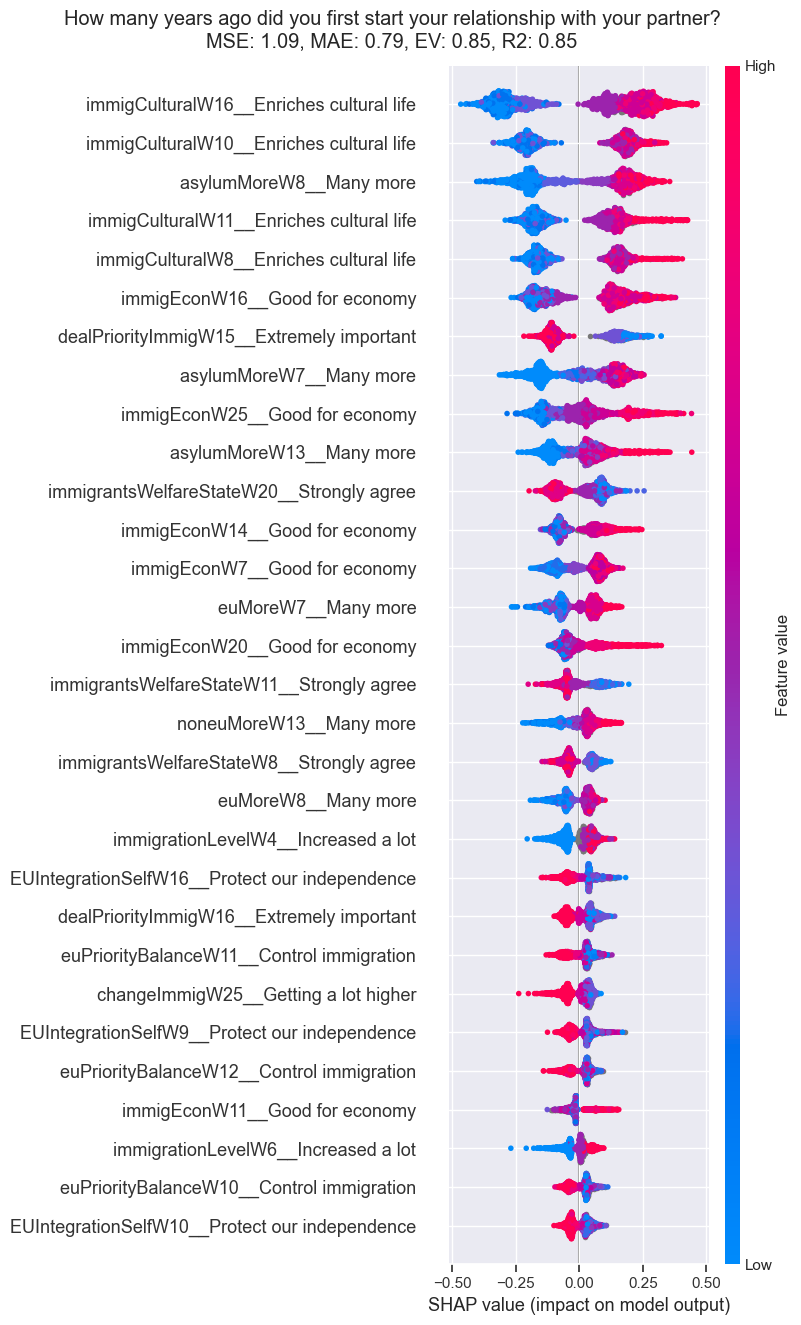

Wall time: 1min 49s


In [99]:
%%time
name = "immig_var_1"
var_stub_list = ["immigSelf","immig_var_2"]

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",
    dataset=BES_reduced_with_na[immigSelves.notnull().all(axis=1)],
                                                    var_list = [name], var_stub_list = var_stub_list, verbosity=0)

In [100]:
BES_reduced_with_na["immig_var_2"] = np.nan
BES_reduced_with_na.loc[immigSelves.notnull().all(axis=1),"immig_var_2"] = BES_decomp[:,1]

MSE: 0.42, MAE: 0.47, EV: 0.26, R2: 0.26


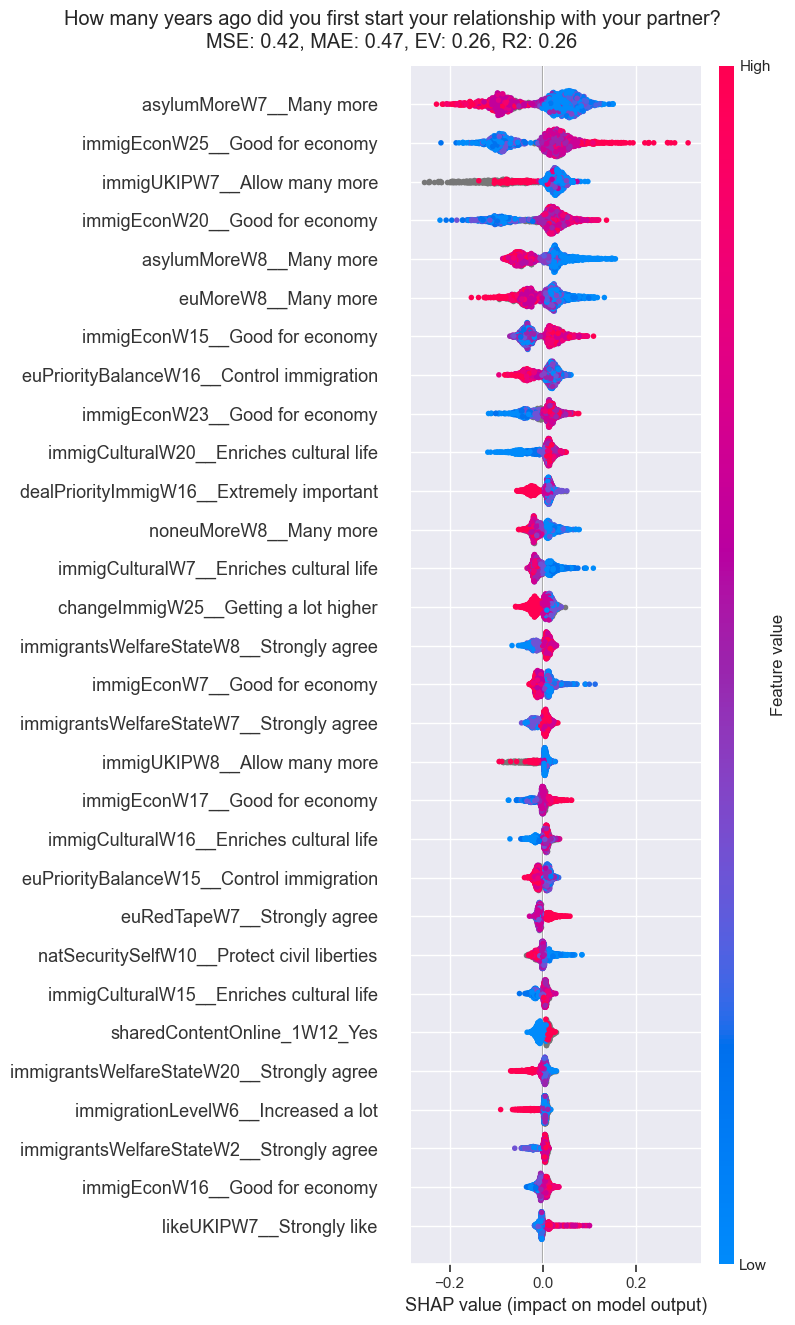

Wall time: 1min 6s


In [102]:
%%time
name = "immig_var_2"
var_stub_list = ["immigSelf","immig_var_1"]

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",
    dataset=BES_reduced_with_na[immigSelves.notnull().all(axis=1)],
                                                    var_list = [name], var_stub_list = var_stub_list, verbosity=0)

In [83]:
BES_reduced_with_na[immigSelves.notnull().all(axis=1)]

turnoutUKGeneralW1__Very likely that I will vote  \
29                                                  4.0   
83                                                  4.0   
102                                                 4.0   
125                                                 4.0   
129                                                 4.0   
...                                                 ...   
50717                                               NaN   
50870                                               NaN   
50884                                               NaN   
51025                                               NaN   
51037                                               NaN   

       turnoutUKGeneralW2__Very likely that I will vote  \
29                                                  4.0   
83                                                  4.0   
102                                                 4.0   
125                                                 4.0   
129                                                 4.0   
...                                                 ...   
50717                                               NaN   
50870                                               NaN   
50884                                               NaN   
51025                                               NaN   
51037                                               NaN   

       turnoutUKGeneralW3__Very likely that I will vote  \
29                                                  4.0   
83                                                  4.0   
102                                                 4.0   
125                                                 4.0   
129                                                 4.0   
...                                                 ...   
50717                                               NaN   
50870                                               NaN   
50884                                               NaN   
51025                                               NaN   
51037                                               NaN   

       turnoutUKGeneralW4__Very likely that I will vote  \
29                                                  3.0   
83                                                  4.0   
102                                                 4.0   
125                                                 4.0   
129                                                 4.0   
...                                                 ...   
50717                                               NaN   
50870                                               NaN   
50884                                               NaN   
51025                                               NaN   
51037                                               NaN   

       turnoutUKGeneralW5__Very likely that I will vote  \
29                                                  4.0   
83                                                  4.0   
102                                                 4.0   
125                                                 4.0   
129                                                 4.0   
...                                                 ...   
50717                                               NaN   
50870                                               NaN   
50884                                               NaN   
51025                                               NaN   
51037                                               NaN   

       turnoutUKGeneralW7__Very likely that I will vote  \
29                                                  4.0   
83                                                  4.0   
102                                                 4.0   
125                                                 4.0   
129                                                 4.0   
...                                                 ...   
50717                                            

In [89]:
corrs = BES_reduced_with_na[immigSelves.notnull().all(axis=1)].corrwith( BES_reduced_with_na.loc[immigSelves.notnull().all(axis=1),"immig_var_1"] )

In [92]:
corrs.dropna().sort_values().tail(50)

immigEconW4__Good for economy               0.668955
asylumMoreW7__Many more                     0.673761
immigEconW3__Good for economy               0.673826
immigEconW2__Good for economy               0.675050
asylumMoreW25__Many more                    0.675333
asylumMoreW8__Many more                     0.685422
immigCulturalW4__Enriches cultural life     0.691839
globalMigrationW20__Mainly good             0.693612
immigEconW17__Good for economy              0.696521
immigEconW11__Good for economy              0.696627
immigCulturalW3__Enriches cultural life     0.699959
immigEconW10__Good for economy              0.705003
immigCulturalW2__Enriches cultural life     0.711121
immigEconW15__Good for economy              0.714343
immigEconW14__Good for economy              0.716359
immigEconW20__Good for economy              0.718428
immigEconW7__Good for economy               0.731497
asylumMoreW13__Many more                    0.732811
immigEconW8__Good for economy               0.

In [112]:
immigSelves_plus = BES_reduced_with_na[search_eff(BES_reduced_with_na.columns,"immigSelf|immigEcon|immigCultural")]
immigSelves_plus.drop("immigSelfW12__Allow many more",axis=1,inplace=True) # only 8259 non nulls
immigSelves_plus.drop("immigSelfW21__Allow many more",axis=1,inplace=True)
immigSelves_plus.drop("immigSelfW17__Allow many more",axis=1,inplace=True)
immigSelves_plus.drop("immigSelfW22__Allow many more",axis=1,inplace=True)
immigSelves_plus.drop("immigSelfW23__Allow many more",axis=1,inplace=True)
# immigSelves_plus.drop("immigCulturalW12__Enriches cultural life",axis=1,inplace=True)
immigSelves_plus.drop("immigCulturalW17__Enriches cultural life",axis=1,inplace=True)
# immigSelves_plus.drop("immigEconW12__Good for economy",axis=1,inplace=True)
immigSelves_plus.drop("immigEconW17__Good for economy",axis=1,inplace=True)
# immigSelves_plus.drop("immigEconW21__Good for economy",axis=1,inplace=True)
immigSelves_plus.drop("immigEconW22__Good for economy",axis=1,inplace=True)
immigSelves_plus.drop("immigEconW23__Good for economy",axis=1,inplace=True)

immigSelves_plus.drop("immigCulturalW10__Enriches cultural life",axis=1,inplace=True)
immigSelves_plus.drop("immigCulturalW13__Enriches cultural life",axis=1,inplace=True)
immigSelves_plus.drop("immigCulturalW14__Enriches cultural life",axis=1,inplace=True)
immigSelves_plus.drop("immigEconW10__Good for economy",axis=1,inplace=True)
immigSelves_plus.drop("immigEconW13__Good for economy",axis=1,inplace=True)
immigSelves_plus.drop("immigEconW14__Good for economy",axis=1,inplace=True)


display(immigSelves_plus.notnull().sum())

# dontKnows = BES_Panel[search_eff(BES_Panel.columns,"immigSelf")]=="Don't know"
# dontKnows.drop("immigSelfW12",axis=1,inplace=True)
# dontKnows.drop("immigSelfW13",axis=1,inplace=True)
# dontKnows.drop("immigSelfW21",axis=1,inplace=True)
# dontKnows.drop("immigSelfW17",axis=1,inplace=True)
# dontKnows.drop("immigSelfW22",axis=1,inplace=True)
# dontKnows.drop("immigSelfW23",axis=1,inplace=True)

# dontKnows.columns = immigSelves_plus.columns
for col in immigSelves_plus.columns:
    immigSelves.loc[(BES_Panel[col.split("__")[0]]=="Don't know").values,col] = 5

display(immigSelves_plus.notnull().all(axis=1).sum())

display(immigSelves_plus.diff(axis=1).notnull().sum())

immigEconW1__Good for economy               29096
immigCulturalW1__Enriches cultural life     29366
immigEconW2__Good for economy               29257
immigCulturalW2__Enriches cultural life     29634
immigEconW3__Good for economy               27076
immigCulturalW3__Enriches cultural life     27382
immigEconW4__Good for economy               29959
immigCulturalW4__Enriches cultural life     30172
immigEconW7__Good for economy               28773
immigCulturalW7__Enriches cultural life     29014
immigSelfW7__Allow many more                26966
immigEconW8__Good for economy               31624
immigCulturalW8__Enriches cultural life     31900
immigSelfW8__Allow many more                30249
immigSelfW9__Allow many more                28146
immigSelfW10__Allow many more               26967
immigEconW11__Good for economy              28986
immigCulturalW11__Enriches cultural life    29115
immigSelfW11__Allow many more               27908
immigSelfW14__Allow many more               28138


628

immigEconW1__Good for economy                   0
immigCulturalW1__Enriches cultural life     28703
immigEconW2__Good for economy               25053
immigCulturalW2__Enriches cultural life     28959
immigEconW3__Good for economy               22565
immigCulturalW3__Enriches cultural life     26752
immigEconW4__Good for economy               22113
immigCulturalW4__Enriches cultural life     29537
immigEconW7__Good for economy               19239
immigCulturalW7__Enriches cultural life     28311
immigSelfW7__Allow many more                26342
immigEconW8__Good for economy               20859
immigCulturalW8__Enriches cultural life     31264
immigSelfW8__Allow many more                29690
immigSelfW9__Allow many more                24266
immigSelfW10__Allow many more               17022
immigEconW11__Good for economy              19097
immigCulturalW11__Enriches cultural life    28550
immigSelfW11__Allow many more               27247
immigSelfW14__Allow many more               16802


In [113]:
# necessarily sample size for *complete* data over multiples waves is going to be Le Suck

BES_std = immigSelves_plus[immigSelves_plus.notnull().all(axis=1)]
BES_std = standard_scale(BES_std)

average log-likelihood of all samples: -24.537976301504834
number of iterations: 7
Wall time: 315 ms


<AxesSubplot:>

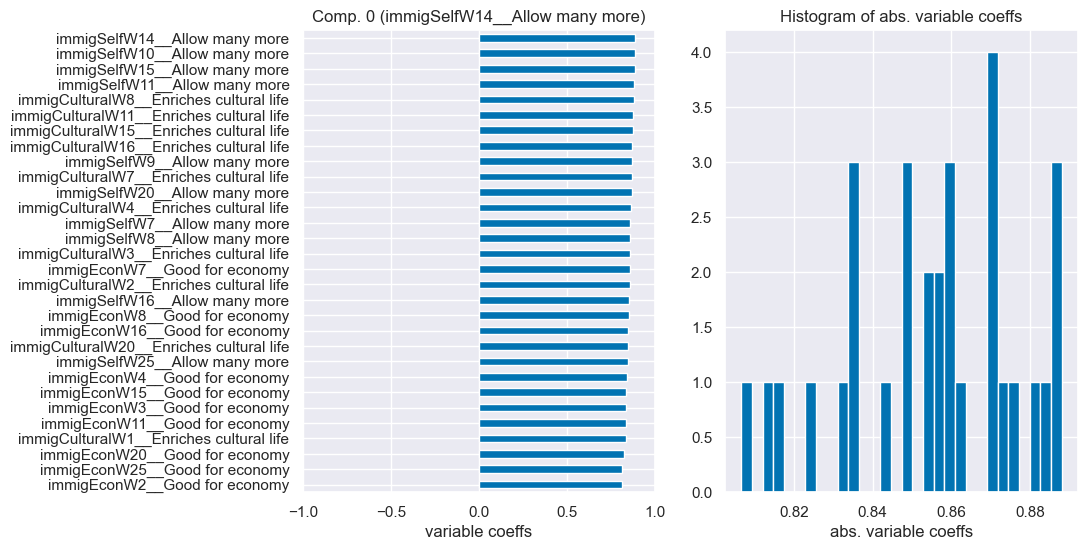

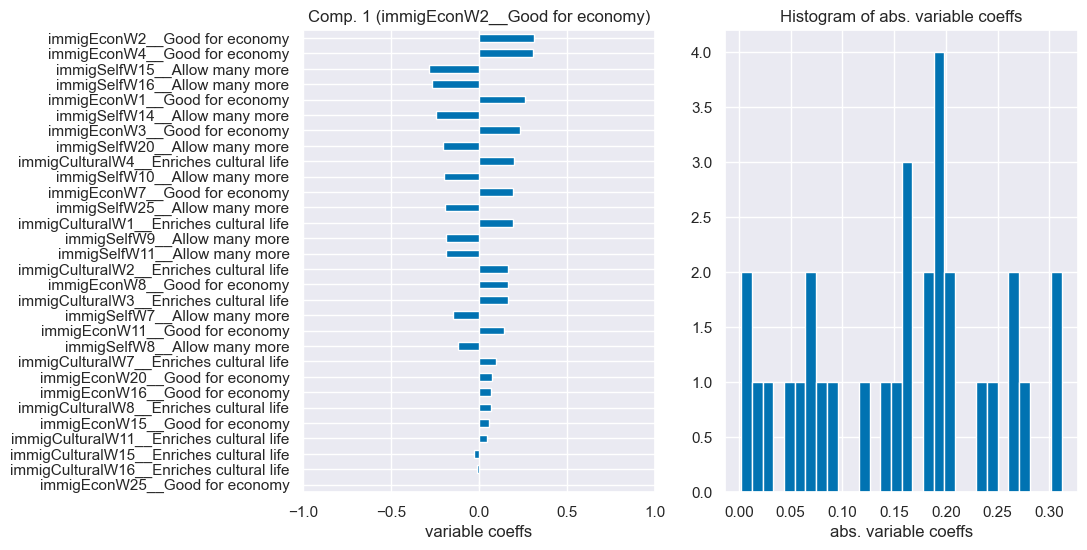

In [115]:
%%time
from sklearn.decomposition import PCA, FactorAnalysis

n_components = 2

# decomp = PCA(svd_solver="full",n_components =n_components )
decomp = FactorAnalysis(n_components =n_components )

decomp.fit(BES_std)
BES_decomp = decomp.transform(BES_std)
# BES_decomp  = pd.DataFrame(BES_decomp,index=BES_num.index)
cols = BES_std.columns
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp, cols, BES_decomp,
                                                          show_first_x_comps=n_components);

display_pca_data(n_components, decomp, BES_std)
sns.scatterplot(x=BES_decomp[:,0],y=BES_decomp[:,1]);

In [119]:
mask = immigSelves_plus.notnull().all(axis=1)

BES_reduced_with_na["immig_var_1"] = np.nan
BES_reduced_with_na.loc[mask,"immig_var_1"] = BES_decomp[:,0]
BES_reduced_with_na["immig_var_2"] = np.nan
BES_reduced_with_na.loc[mask,"immig_var_2"] = BES_decomp[:,1]

MSE: 0.12, MAE: 0.27, EV: 0.88, R2: 0.88


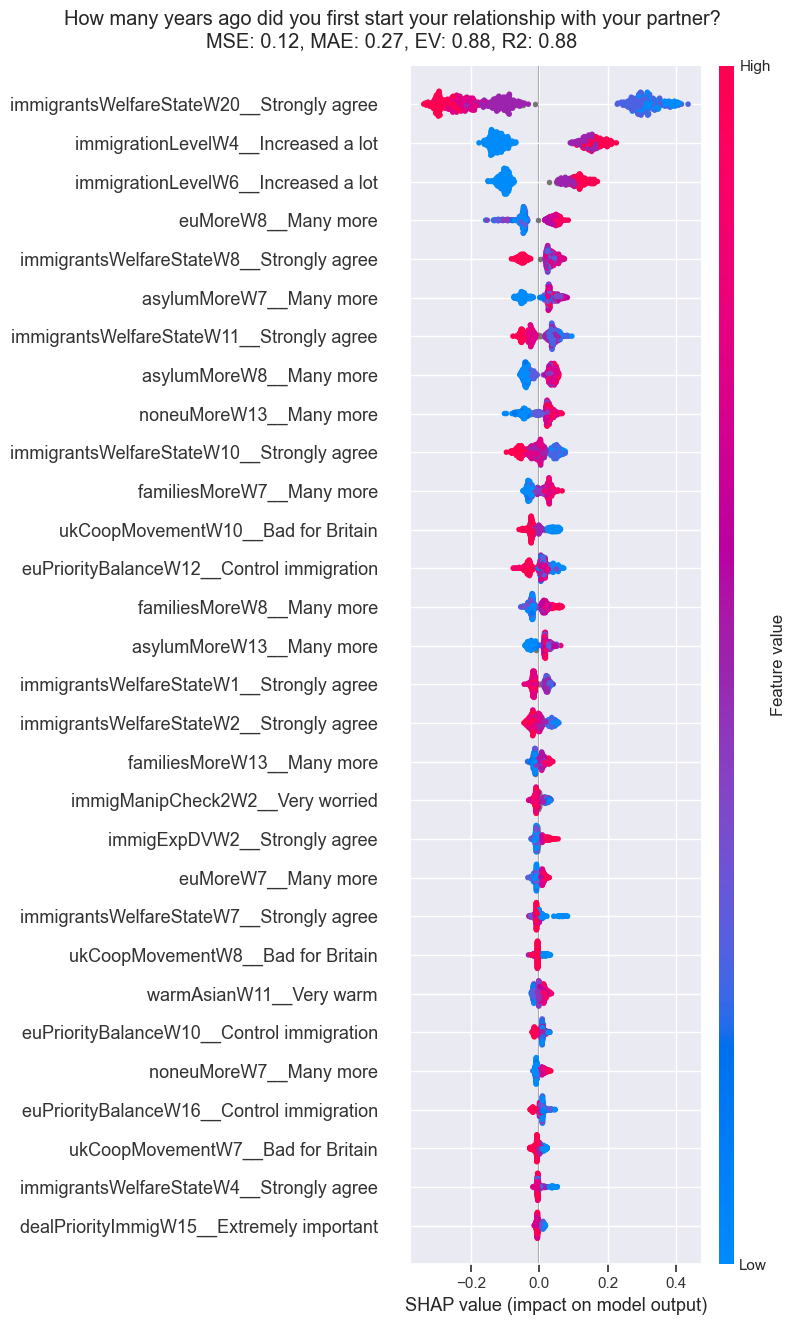

MSE: 0.85, MAE: 0.71, EV: 0.07, R2: 0.07


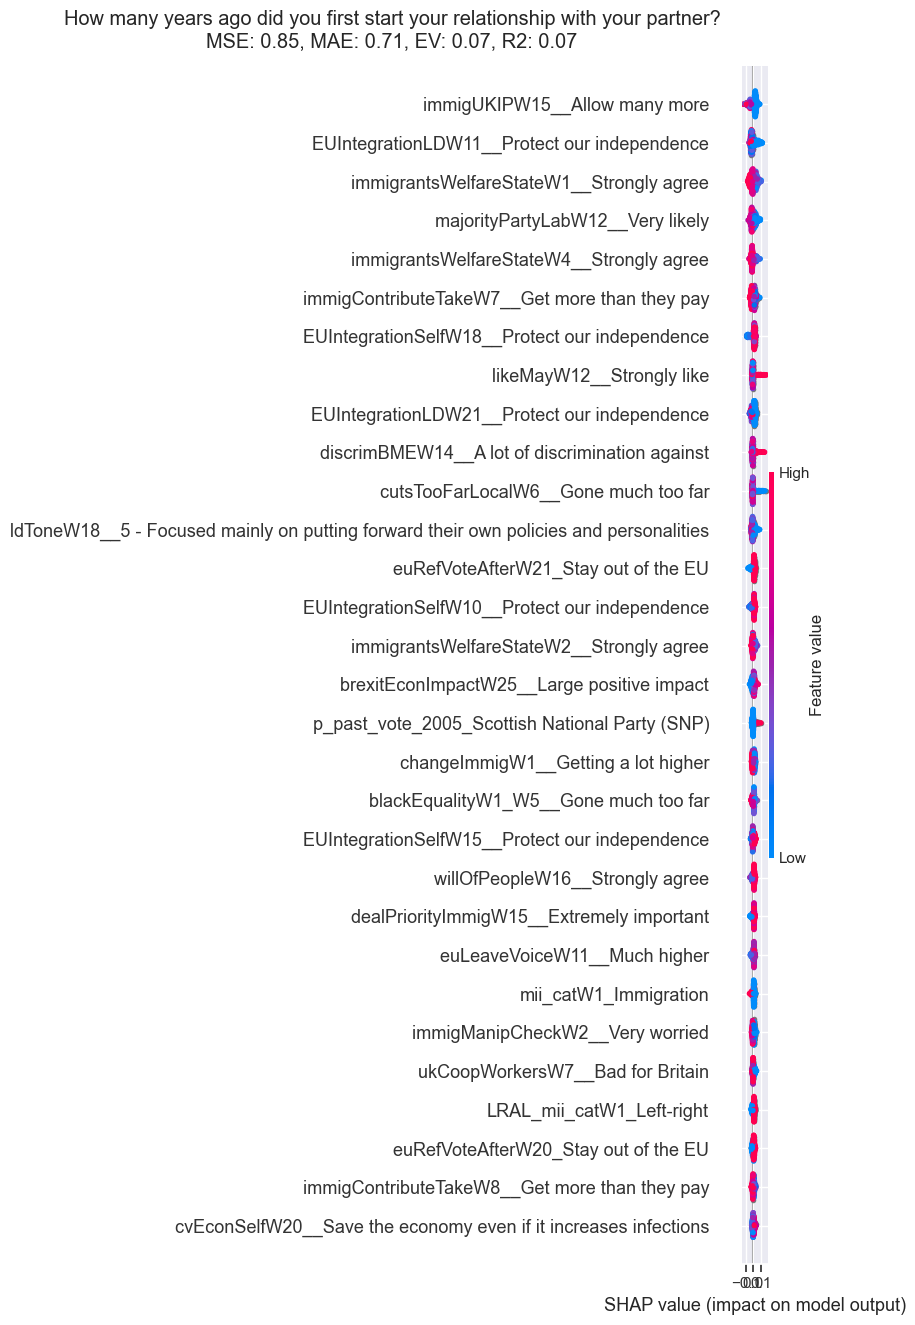

Wall time: 1min 23s


In [122]:
%%time
name = "immig_var_1"
var_stub_list = ["immigSelf","immig_var_2","immigCultural","immigEcon"]

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",
    dataset=BES_reduced_with_na[mask],
                                                    var_list = [name], var_stub_list = var_stub_list, verbosity=0)

name = "immig_var_2"
var_stub_list = ["immigSelf","immig_var_1","immigCultural","immigEcon"]

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",
    dataset=BES_reduced_with_na[mask],
                                                    var_list = [name], var_stub_list = var_stub_list, verbosity=0)

In [130]:
immigSelves = BES_reduced_with_na[search_eff(BES_reduced_with_na.columns,"immigSelf")]
immigSelves.drop("immigSelfW12__Allow many more",axis=1,inplace=True) # only 8259 non nulls
# immigSelves.drop("immigSelfW21__Allow many more",axis=1,inplace=True)
# immigSelves.drop("immigSelfW17__Allow many more",axis=1,inplace=True)
# immigSelves.drop("immigSelfW22__Allow many more",axis=1,inplace=True)
# immigSelves.drop("immigSelfW23__Allow many more",axis=1,inplace=True)

display(immigSelves.notnull().sum())

dontKnows = BES_Panel[search_eff(BES_Panel.columns,"immigSelf")]=="Don't know"
dontKnows.drop("immigSelfW12",axis=1,inplace=True)
dontKnows.drop("immigSelfW13",axis=1,inplace=True)
# dontKnows.drop("immigSelfW21",axis=1,inplace=True)
# dontKnows.drop("immigSelfW17",axis=1,inplace=True)
# dontKnows.drop("immigSelfW22",axis=1,inplace=True)
# dontKnows.drop("immigSelfW23",axis=1,inplace=True)

dontKnows.columns = immigSelves.columns
for col in immigSelves.columns:
    immigSelves.loc[dontKnows[col].values,col] = 5

display(immigSelves.notnull().all(axis=1).sum())

display(immigSelves.diff(axis=1).notnull().sum())

immigDiff = immigSelves.diff(axis=1).drop(immigSelves.columns[0],axis=1).dropna()

# necessarily sample size for *complete* data over multiples waves is going to be Le Suck

BES_std = immigDiff
BES_std = standard_scale(BES_std)

immigSelfW7__Allow many more     26966
immigSelfW8__Allow many more     30249
immigSelfW9__Allow many more     28146
immigSelfW10__Allow many more    26967
immigSelfW11__Allow many more    27908
immigSelfW14__Allow many more    28138
immigSelfW15__Allow many more    27678
immigSelfW16__Allow many more    33922
immigSelfW17__Allow many more    30535
immigSelfW20__Allow many more    28510
immigSelfW21__Allow many more    27397
immigSelfW22__Allow many more    25277
immigSelfW23__Allow many more    28295
immigSelfW25__Allow many more    27826
dtype: int64

976

immigSelfW7__Allow many more         0
immigSelfW8__Allow many more     24432
immigSelfW9__Allow many more     27555
immigSelfW10__Allow many more    19380
immigSelfW11__Allow many more    21949
immigSelfW14__Allow many more    19477
immigSelfW15__Allow many more    20129
immigSelfW16__Allow many more    20063
immigSelfW17__Allow many more    22394
immigSelfW20__Allow many more    18395
immigSelfW21__Allow many more    16514
immigSelfW22__Allow many more    19241
immigSelfW23__Allow many more    20235
immigSelfW25__Allow many more    19549
dtype: int64

average log-likelihood of all samples: -17.975822669248448
number of iterations: 305
Wall time: 655 ms


<AxesSubplot:>

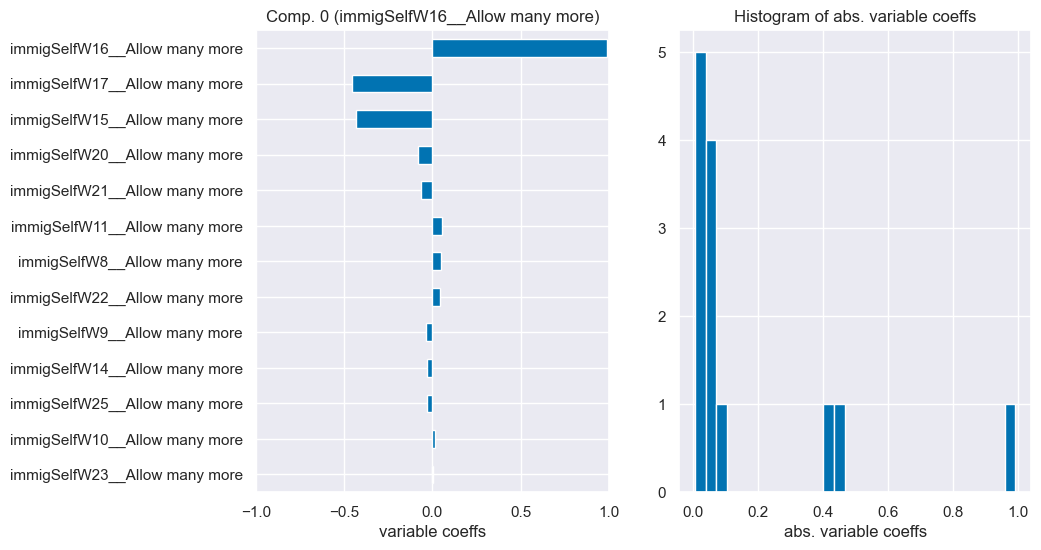

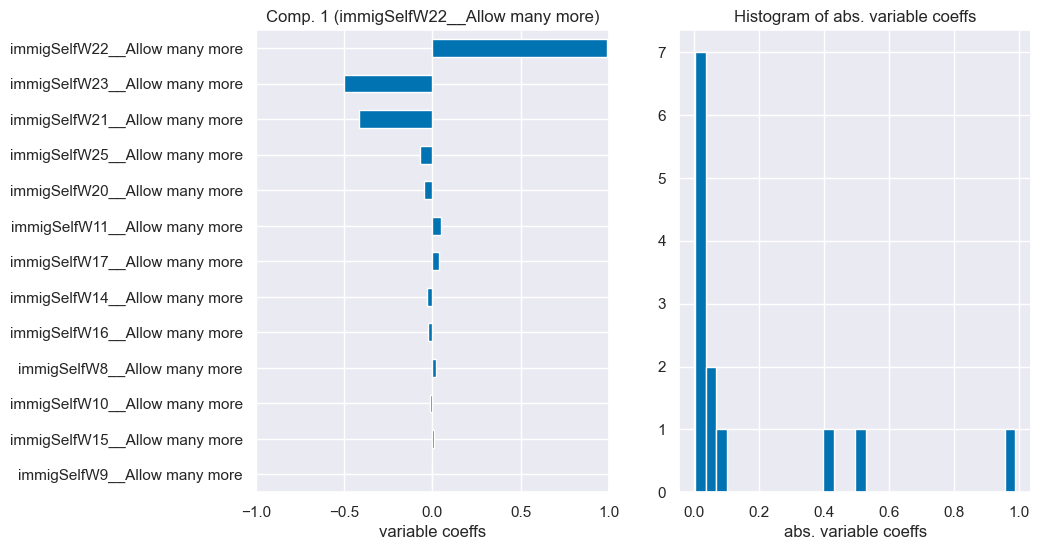

In [134]:
%%time
from sklearn.decomposition import PCA, FactorAnalysis

n_components = 2

# decomp = PCA(svd_solver="full",n_components =n_components )
decomp = FactorAnalysis(n_components =n_components )

decomp.fit(BES_std)
BES_decomp = decomp.transform(BES_std)
# BES_decomp  = pd.DataFrame(BES_decomp,index=BES_num.index)
cols = BES_std.columns
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp, cols, BES_decomp,
                                                          show_first_x_comps=n_components);

display_pca_data(n_components, decomp, BES_std)
sns.scatterplot(x=BES_decomp[:,0],y=BES_decomp[:,1]);

explained variance ratio (first 30): [0.14304229 0.12922842]
explained variance (first 30): [1.86145697 1.68169256]
noise variance: 0.860925800221515
average log-likelihood of all samples: -18.18651296353841
Wall time: 330 ms


<AxesSubplot:>

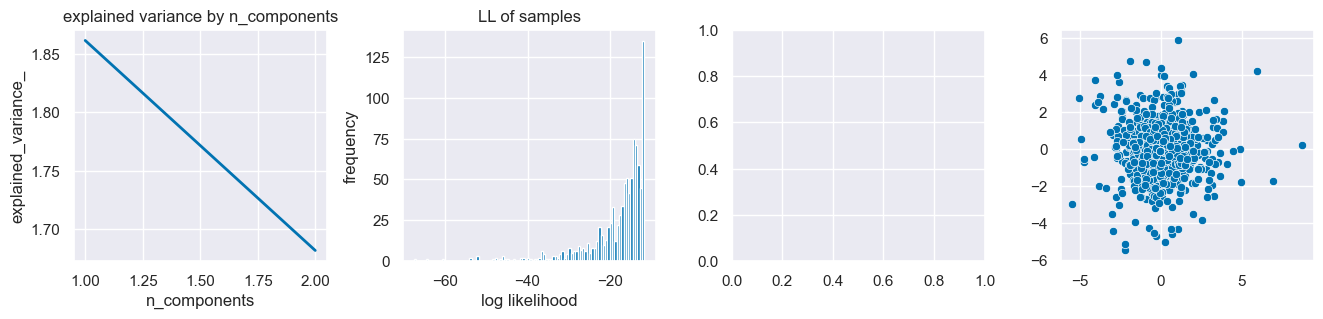

In [135]:
%%time
from sklearn.decomposition import PCA, FactorAnalysis

n_components = 2

decomp = PCA(svd_solver="full",n_components =n_components )
# decomp = FactorAnalysis(n_components =n_components )
# 
decomp.fit(BES_std)
BES_decomp = decomp.transform(BES_std)
# BES_decomp  = pd.DataFrame(BES_decomp,index=BES_num.index)
cols = BES_std.columns
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp, cols, BES_decomp,
                                                          show_first_x_comps=n_components);

display_pca_data(n_components, decomp, BES_std);
sns.scatterplot(x=BES_decomp[:,0],y=BES_decomp[:,1]);

MSE: 1.58, MAE: 0.94, EV: -0.00, R2: -0.01


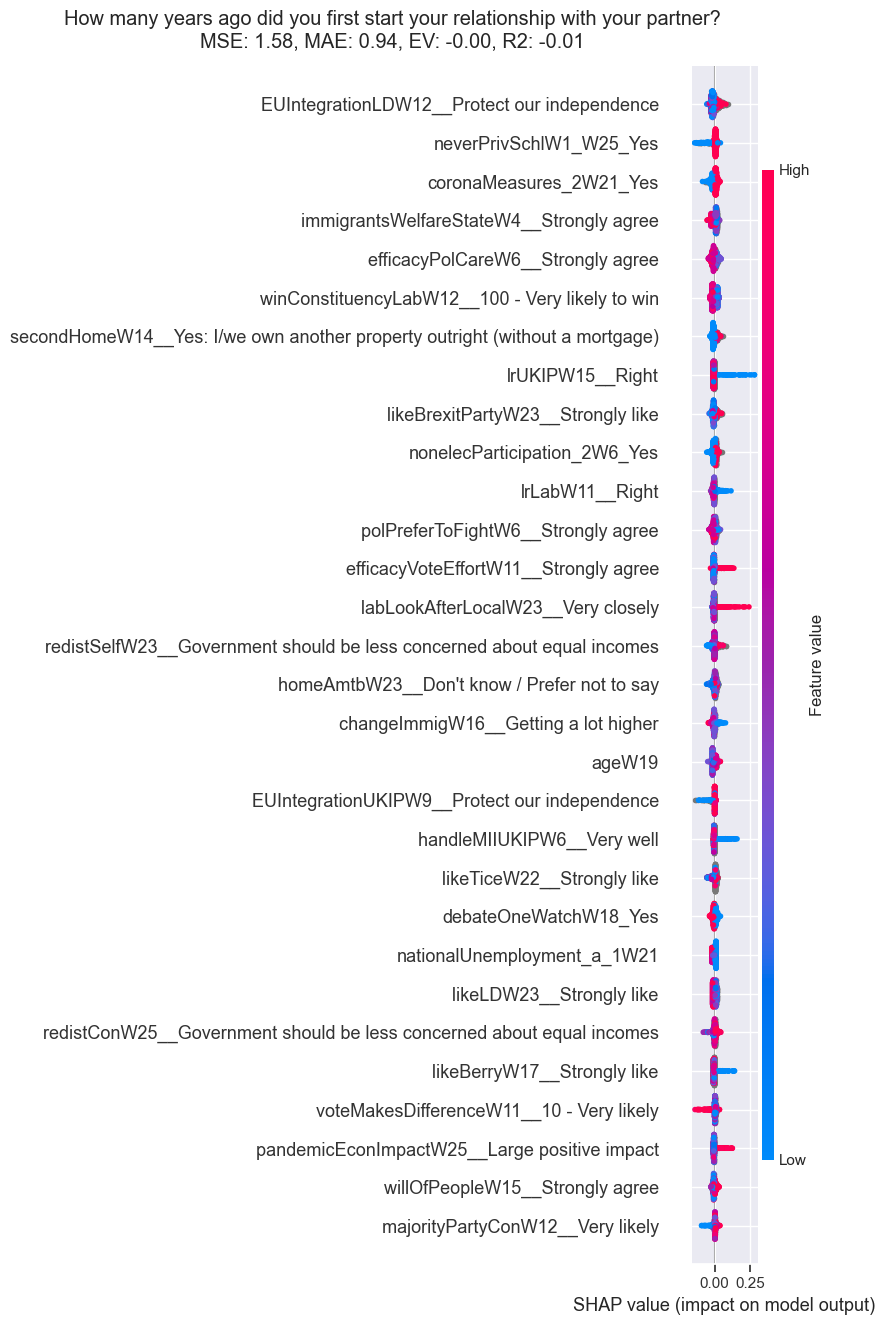

MSE: 1.62, MAE: 0.94, EV: -0.00, R2: -0.01


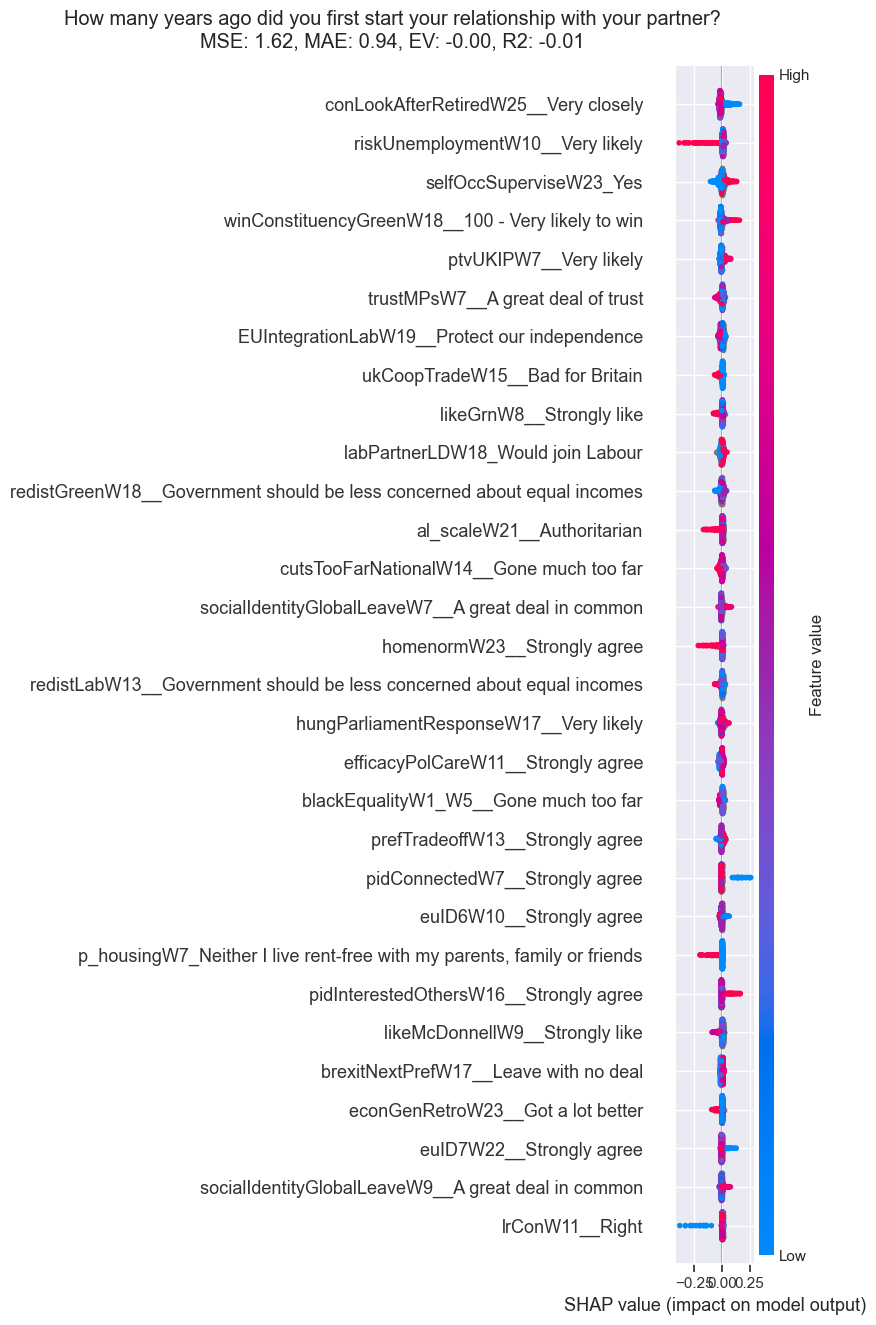

Wall time: 25.2 s


In [136]:
%%time
BES_reduced_with_na["immig_var_1"] = np.nan
BES_reduced_with_na.loc[immigDiff.index,"immig_var_1"] = BES_decomp[:,0]
BES_reduced_with_na["immig_var_2"] = np.nan
BES_reduced_with_na.loc[immigDiff.index,"immig_var_2"] = BES_decomp[:,1]


name = "immig_var_1"
var_stub_list = ["immigSelf","immig_var_2","immigCultural","immigEcon"]

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",
    dataset=BES_reduced_with_na.loc[immigDiff.index],
                                                    var_list = [name], var_stub_list = var_stub_list, verbosity=0)

name = "immig_var_2"
var_stub_list = ["immigSelf","immig_var_1","immigCultural","immigEcon"]

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",
    dataset=BES_reduced_with_na.loc[immigDiff.index],
                                                    var_list = [name], var_stub_list = var_stub_list, verbosity=0)

In [ ]:
# Noise!

In [ ]:
## try with incredibly crude means

In [3]:
immigSelves = BES_reduced_with_na[search_eff(BES_reduced_with_na.columns,"immigSelf")]
immigSelves.drop("immigSelfW12__Allow many more",axis=1,inplace=True) # only 8259 non nulls
# immigSelves.drop("immigSelfW21__Allow many more",axis=1,inplace=True)
# immigSelves.drop("immigSelfW17__Allow many more",axis=1,inplace=True)
# immigSelves.drop("immigSelfW22__Allow many more",axis=1,inplace=True)
# immigSelves.drop("immigSelfW23__Allow many more",axis=1,inplace=True)

display(immigSelves.notnull().sum())

dontKnows = BES_Panel[search_eff(BES_Panel.columns,"immigSelf")]=="Don't know"
dontKnows.drop("immigSelfW12",axis=1,inplace=True)
dontKnows.drop("immigSelfW13",axis=1,inplace=True)
# dontKnows.drop("immigSelfW21",axis=1,inplace=True)
# dontKnows.drop("immigSelfW17",axis=1,inplace=True)
# dontKnows.drop("immigSelfW22",axis=1,inplace=True)
# dontKnows.drop("immigSelfW23",axis=1,inplace=True)

dontKnows.columns = immigSelves.columns
for col in immigSelves.columns:
    immigSelves.loc[dontKnows[col].values,col] = 5

mask = immigSelves.notnull().any(axis=1)
immigSelves = immigSelves[mask]
immigSelves = immigSelves.fillna(immigSelves.mean())
BES_std = standard_scale(immigSelves)

immigSelfW7__Allow many more     26966
immigSelfW8__Allow many more     30249
immigSelfW9__Allow many more     28146
immigSelfW10__Allow many more    26967
immigSelfW11__Allow many more    27908
immigSelfW14__Allow many more    28138
immigSelfW15__Allow many more    27678
immigSelfW16__Allow many more    33922
immigSelfW17__Allow many more    30535
immigSelfW20__Allow many more    28510
immigSelfW21__Allow many more    27397
immigSelfW22__Allow many more    25277
immigSelfW23__Allow many more    28295
immigSelfW25__Allow many more    27826
dtype: int64

In [4]:
%%time
from sklearn.decomposition import PCA, FactorAnalysis

n_components = 2

# decomp = PCA(svd_solver="full",n_components =n_components )
decomp = FactorAnalysis(n_components =n_components )

decomp.fit(BES_std)
BES_decomp = decomp.transform(BES_std)
# BES_decomp  = pd.DataFrame(BES_decomp,index=BES_num.index)
cols = BES_std.columns
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp, cols, BES_decomp,
                                                          show_first_x_comps=n_components);

display_pca_data(n_components, decomp, BES_std);
sns.scatterplot(x=BES_decomp[:,0],y=BES_decomp[:,1]);

average log-likelihood of all samples: -17.436529285248184
number of iterations: 11
Wall time: 1.83 s


<AxesSubplot:>

In [166]:
# %%time
# from sklearn.decomposition import PCA, FactorAnalysis

# n_components = 2

# decomp = PCA(svd_solver="full",n_components =n_components )
# # decomp = FactorAnalysis(n_components =n_components )

# decomp.fit(BES_std)
# BES_decomp = decomp.transform(BES_std)
# # BES_decomp  = pd.DataFrame(BES_decomp,index=BES_num.index)
# cols = BES_std.columns
# (BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp, cols, BES_decomp,
#                                                           show_first_x_comps=n_components);

# display_pca_data(n_components, decomp, BES_std);
# sns.scatterplot(x=BES_decomp[:,0],y=BES_decomp[:,1]);

MSE: 0.10, MAE: 0.21, EV: 0.89, R2: 0.89


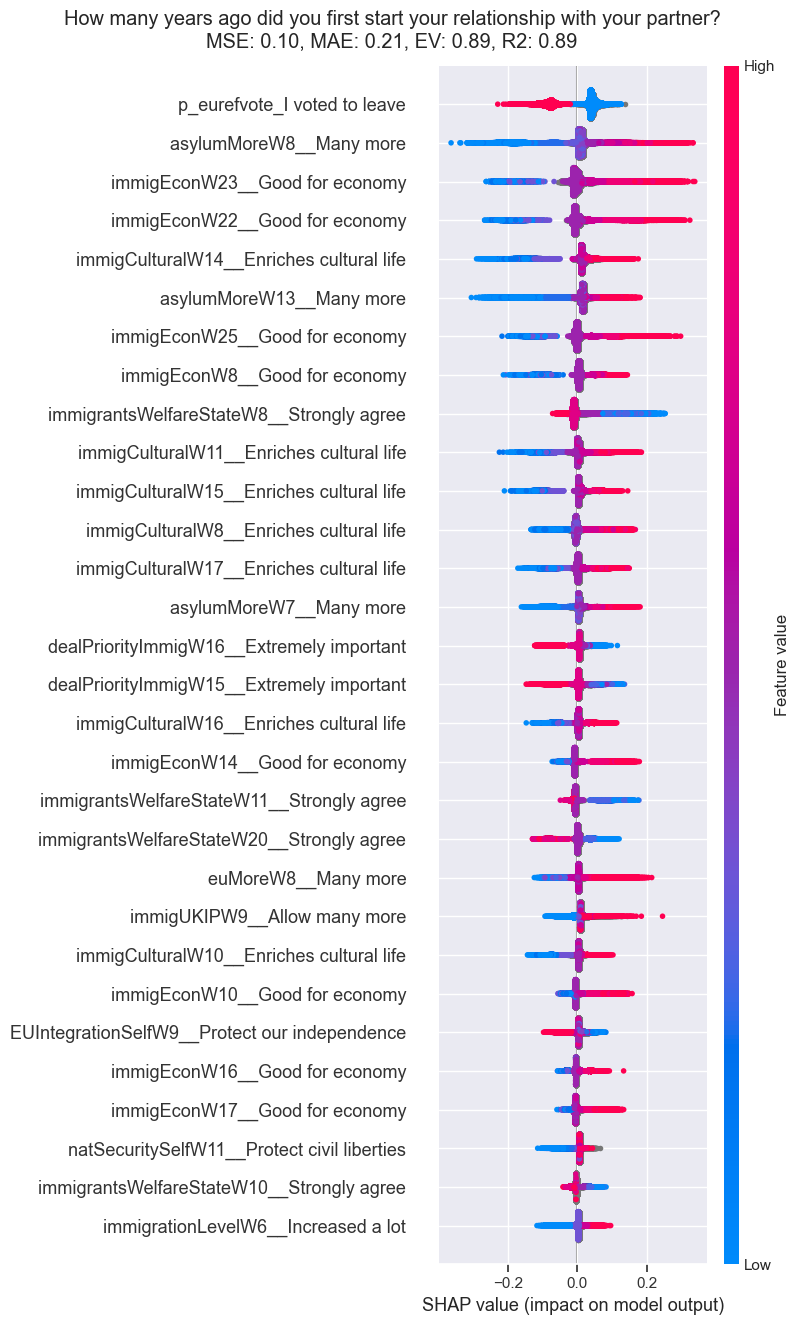

MSE: 0.16, MAE: 0.27, EV: 0.78, R2: 0.78


Wall time: 49min 16s


In [5]:
%%time
BES_reduced_with_na["immig_var_1"] = np.nan
BES_reduced_with_na.loc[immigSelves.index,"immig_var_1"] = BES_decomp[:,0]
BES_reduced_with_na["immig_var_2"] = np.nan
BES_reduced_with_na.loc[immigSelves.index,"immig_var_2"] = BES_decomp[:,1]


name = "immig_var_1"
var_stub_list = ["immigSelf","immig_var_2"]

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",
    dataset=BES_reduced_with_na.loc[immigSelves.index],
                                                    var_list = [name], var_stub_list = var_stub_list, verbosity=0)

name = "immig_var_2"
var_stub_list = ["immigSelf","immig_var_1"]

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",
    dataset=BES_reduced_with_na.loc[immigSelves.index],
                                                    var_list = [name], var_stub_list = var_stub_list, verbosity=0)

In [ ]:
## similar pattern

# factor 1 - broad based main axis of immigration sentiment
# factor 2 - swings one way for 7/8*/9/10/11, the other for 15/16/17/20/21/22*/23/25 * peaks
#          - immigEcon W22/23/25
#          - W8/W9 variables (asylumMore, immigrantsWelfareState, immigEcon, immigCultural, euMore)
#          - immigrantsWelfareStateW20
#          - immigUKIPW9

In [174]:
memory_use(locs = locals().items())

           BES_reduced_with_na:  11.0GiB
                     BES_Panel:   1.5GiB
              immigSelves_plus:  31.3MiB
                            _6:  17.7MiB
                          _140:  17.7MiB
                          _141:  17.7MiB
                          _146:  17.7MiB
                          _158:  17.7MiB
                           _12:  16.8MiB
                           _13:  16.8MiB
